In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_data = np.linspace(0.0, 10.0, 250)
noise = np.random.randn(len(x_data))

#y = mx + b (here m = 0.5 and b = 5)  
y_data = (0.5*x_data) + 5 + noise

In [3]:
final_data = pd.concat([pd.DataFrame(data=x_data, columns=['X']), pd.DataFrame(data=y_data, columns=['y'])], axis=1)
final_data.head()

,X,y
0,0.000000,6.192537
1,0.040161,3.459877
2,0.080321,3.508637
3,0.120482,5.127742
4,0.160643,4.913428


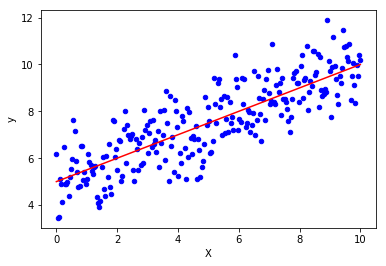

In [4]:
y_hat = 0.5 * x_data + 5
final_data.plot(kind='scatter', x='X', y='y', color='blue')
plt.plot(final_data['X'],y_hat,'r')
plt.show()

In [5]:
#Parameter
learning_rate = 0.01
training_epoch = 1000
display_step = 50

#Training Data
train_x = final_data['X']
train_y = final_data['y']

n_sample = train_x.shape[0]

#tf Graph Input
X = tf.placeholder("float32")
Y = tf.placeholder("float32")

#set model weights
W = tf.Variable(0.5)
b = tf.Variable(1.0)

# Construct a linear model
pred = tf.add(tf.multiply(W,X), b)

# Mean Squared Error
cost = tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * n_sample)
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize all variables
init = tf.global_variables_initializer()

Epoch: 50 , Cost = 1.961879373, W = 1.011196375, b = 1.540545702 
Epoch: 100 , Cost = 1.636211991, W = 0.953179955, b = 1.938877463 
Epoch: 150 , Cost = 1.381529450, W = 0.901872277, b = 2.291143656 
Epoch: 200 , Cost = 1.182373762, W = 0.856500089, b = 2.602650404 
Epoch: 250 , Cost = 1.026625395, W = 0.816375971, b = 2.878137589 
Epoch: 300 , Cost = 0.904826939, W = 0.780890882, b = 3.121767044 
Epoch: 350 , Cost = 0.809581280, W = 0.749510467, b = 3.337216854 
Epoch: 400 , Cost = 0.735107541, W = 0.721762955, b = 3.527727604 
Epoch: 450 , Cost = 0.676868856, W = 0.697223067, b = 3.696206331 
Epoch: 500 , Cost = 0.631329954, W = 0.675523639, b = 3.845188379 
Epoch: 550 , Cost = 0.595723212, W = 0.656336188, b = 3.976924896 
Epoch: 600 , Cost = 0.567879081, W = 0.639368653, b = 4.093423843 
Epoch: 650 , Cost = 0.546095312, W = 0.624355555, b = 4.196502209 
Epoch: 700 , Cost = 0.529067755, W = 0.611082673, b = 4.287628174 
Epoch: 750 , Cost = 0.515754163, W = 0.599344909, b = 4.3682103

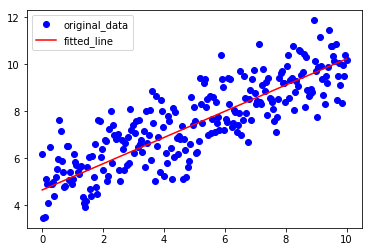

In [8]:
# Start training
with tf.Session() as sess:
    
    sess.run(init)
    #fit all training_data
    for epoch in range(training_epoch):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y: y})
            
        #display log per epoch
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict= {X: train_x, Y: train_y})
            print("Epoch: {} , Cost = {:.9f}, W = {:.9f}, b = {:.9f} ".format((epoch+1), c, sess.run(W), sess.run(b)))
            
    #Optimization_finished
    final_cost = sess.run(cost, feed_dict={X: train_x, Y: train_y})
    print("\nTraining cost: {:.9f}, W = {:.9f}, b = {:.9f} ".format(final_cost, sess.run(W), sess.run(b)))
    
    pred = sess.run(W) * train_x + sess.run(b)
    
    plt.plot(train_x, train_y, 'bo', label='original_data')
    plt.plot(train_x, pred, label = 'fitted_line', color='red')
    plt.legend()
    plt.show()
  